In [15]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sb
from matplotlib import font_manager as fm
from pandas import DataFrame
import numpy as np

In [4]:
my_dpi = 120
fpath = "./NotoSansKR-Regular.ttf"
fprop = fm.FontProperties(fname=fpath)
fname = fprop.get_name()


plt.rcParams['font.family'] = fname
plt.rcParams['font.size'] = 6
plt.rcParams['axes.unicode_minus'] = False


In [8]:
origin = load_data('boston')
print(f"데이터셋 크기:{origin.shape}")
print(f"행 개수: {origin.shape[0]}개")
print(f"열 개수:{origin.shape[1]}개")

print("\n 데이터 타입 정보")
print(origin.info())

origin.head()

[data] https://data.hossam.kr/data/kaggle/boston.xlsx
[desc] 보스턴 인근 지역의 인구·환경·교육·범죄·세금 정보 등을 기반으로 주택의 중위가격(MEDV)을 예측하기 위해 수집된 대표적인 회귀 분석용 주택시장 데이터 (출처: https://www.kaggle.com/datasets/altavish/boston-housing-dataset)

field    description
-------  ---------------------------------------------------------------------------------------
CRIM     타운별 1인당 범죄율 (Per capita crime rate by town)
ZN       25,000 sqft 이상 주거용 대지 비율 (Proportion of residential land zoned for large lots)
INDUS    비소매 상업구역 비율 (Proportion of non-retail business acres per town)
CHAS     찰스강 인접 여부 (Charles River dummy variable: 1 if tract bounds river; 0 otherwise)
NOX      대기 오염 정도 (Nitric oxides concentration, parts per 10 million)
RM       주택당 평균 방(Room) 수 (Average number of rooms per dwelling)
AGE      1940년 이전 건축 비율 (Proportion of owner-occupied units built prior to 1940)
DIS      5개 주요 고용센터까지의 거리 (Weighted distances to five Boston employment centers)
RAD      고속도로 접근성 지수 (Index of accessibility to radial highways)
T

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


📝1-2범주형 변수 CHAS를 적절한 데이터 타입으로 변환

In [10]:
df = origin.astype({'CHAS':'category'})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    int64   
 9   TAX      506 non-null    int64   
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(1), float64(11), int64(2)
memory usage: 52.1 KB


In [12]:
# 📝1-3. 결측치 현황 파악하고 데이터 완성도 평가
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

📝2-1.주택가격(MEDV)과 주요 특성 변수들(CRIM,RM,LSTAT,NOX)에 대한 기술통계 확인

In [13]:
fields = ['MEDV','CRIM','RM','LSTAT','NOX']

df[fields].describe().T

,count,mean,std,min,25%,50%,75%,max
MEDV,506.0,22.532806,9.197104,5.00000,17.025000,21.20000,25.000000,50.0000
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
LSTAT,506.0,12.653063,7.141062,1.73000,6.950000,11.36000,16.955000,37.9700
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710


In [17]:
result = []

for f in fields:
    mean_val = df[f].mean()
    median_val = df[f].median()

    if mean_val > median_val:
        skew_type = "Right-skewed"

    elif mean_val > median_val:
        skew_type = "Left-skewd"
    
    else:
        skew_type = "Symmetric"

    result.append({
        'field':f, 'mean':mean_val, 'median':median_val,
        'skew':skew_type
    })

DataFrame(result)

,field,mean,median,skew
0,MEDV,22.532806,21.20000,Right-skewed
1,CRIM,3.613524,0.25651,Right-skewed
2,RM,6.284634,6.20850,Right-skewed
3,LSTAT,12.653063,11.36000,Right-skewed
4,NOX,0.554695,0.53800,Right-skewed


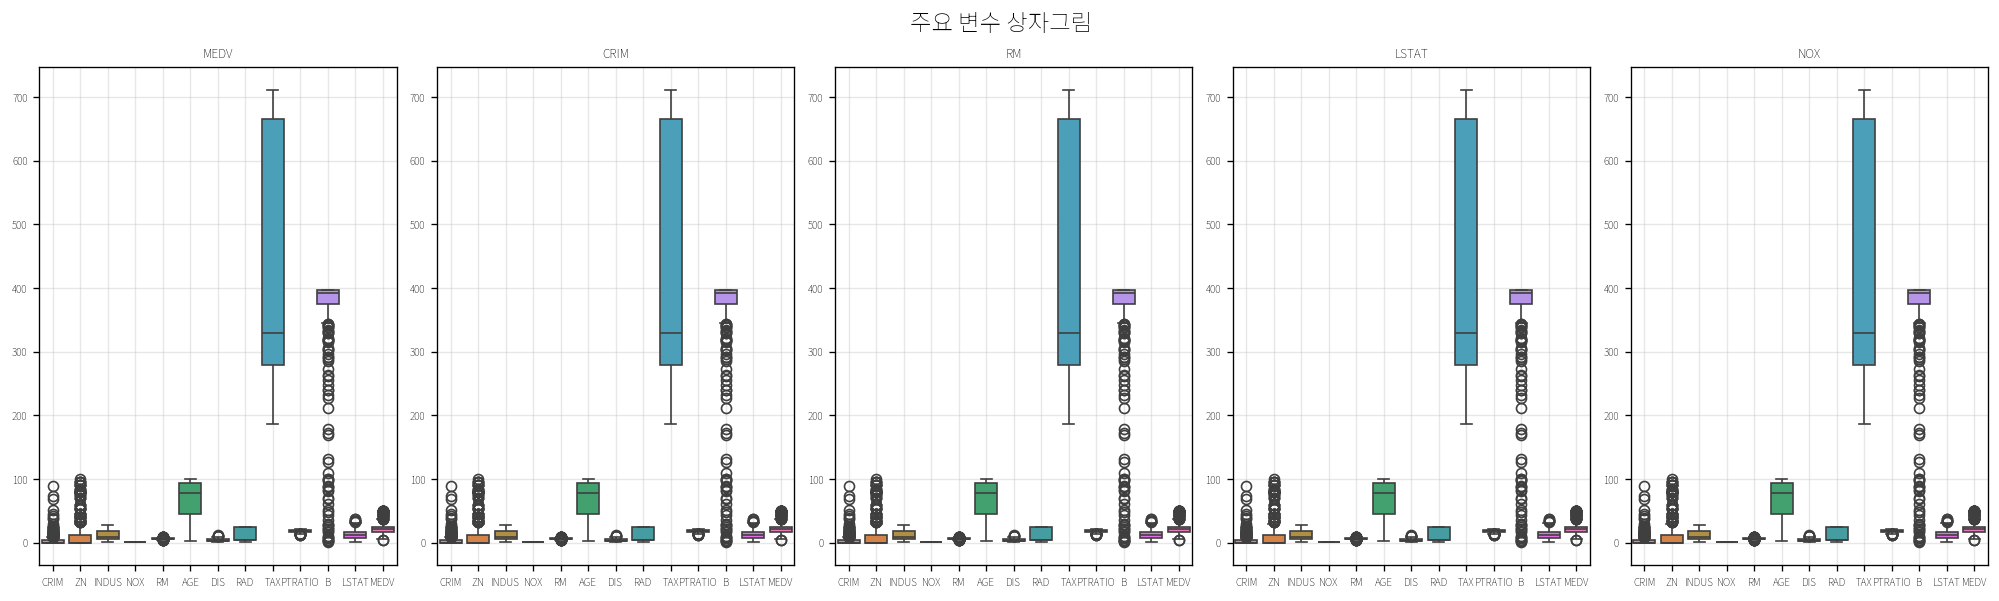

In [20]:
width_px = 2000
height_px = 600
rows = 1
cols=5
figsize = (width_px /my_dpi, height_px/my_dpi)
fig, ax = plt.subplots(rows,cols,figsize=figsize, dpi=my_dpi)

for i, v in enumerate(fields):
    sb.boxplot(data=df, ax=ax[i])
    ax[i].set_title(v)
    ax[i].grid(alpha=0.3)

fig.suptitle('주요 변수 상자그림', fontsize = 14, color ='#000000')
fig.subplots_adjust(wspace=0.2,hspace=0.2)

plt.tight_layout()
plt.show()
plt.close()

📝3-1.주택 가격(MEDV)의 히스토그램을 그리고 분포의 형태를 분석

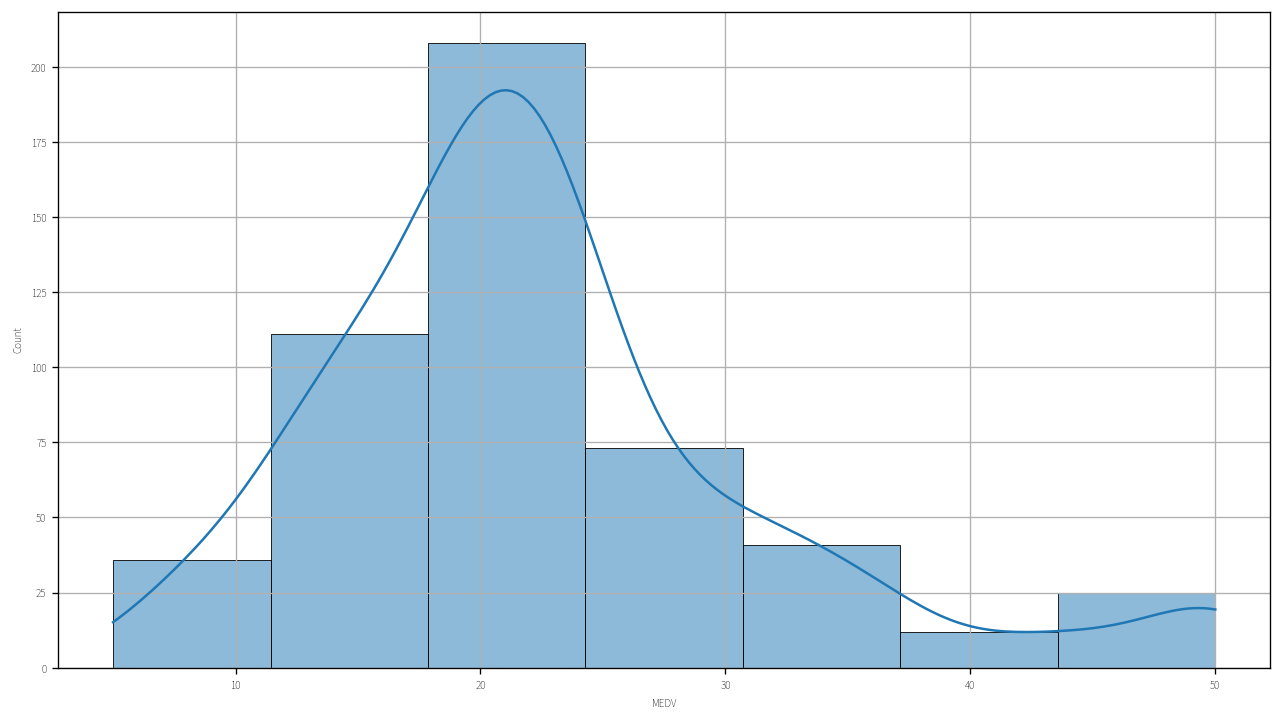

In [26]:
width_px = 1280
height_px = 720
rows = 1
cols=1
figsize = (width_px /my_dpi, height_px/my_dpi)
fig, ax = plt.subplots(rows,cols,figsize=figsize, dpi=my_dpi)

# 그래프 그리기->seaborn 사용
sb.histplot(data=df, x="MEDV", bins=7,edgecolor="#000000",linewidth=0.5,kde = True)


ax.grid(True)
plt.tight_layout()
plt.show()
plt.close()

📝3-2.심하게 치우친 변수들(CRIM,NOX,LSTAT)에 대해 로그 변환 적용 후 변환 전 후의 분포를 비교 분석

In [27]:
skewed_vars = ['CRIM','NOX','LSTAT']

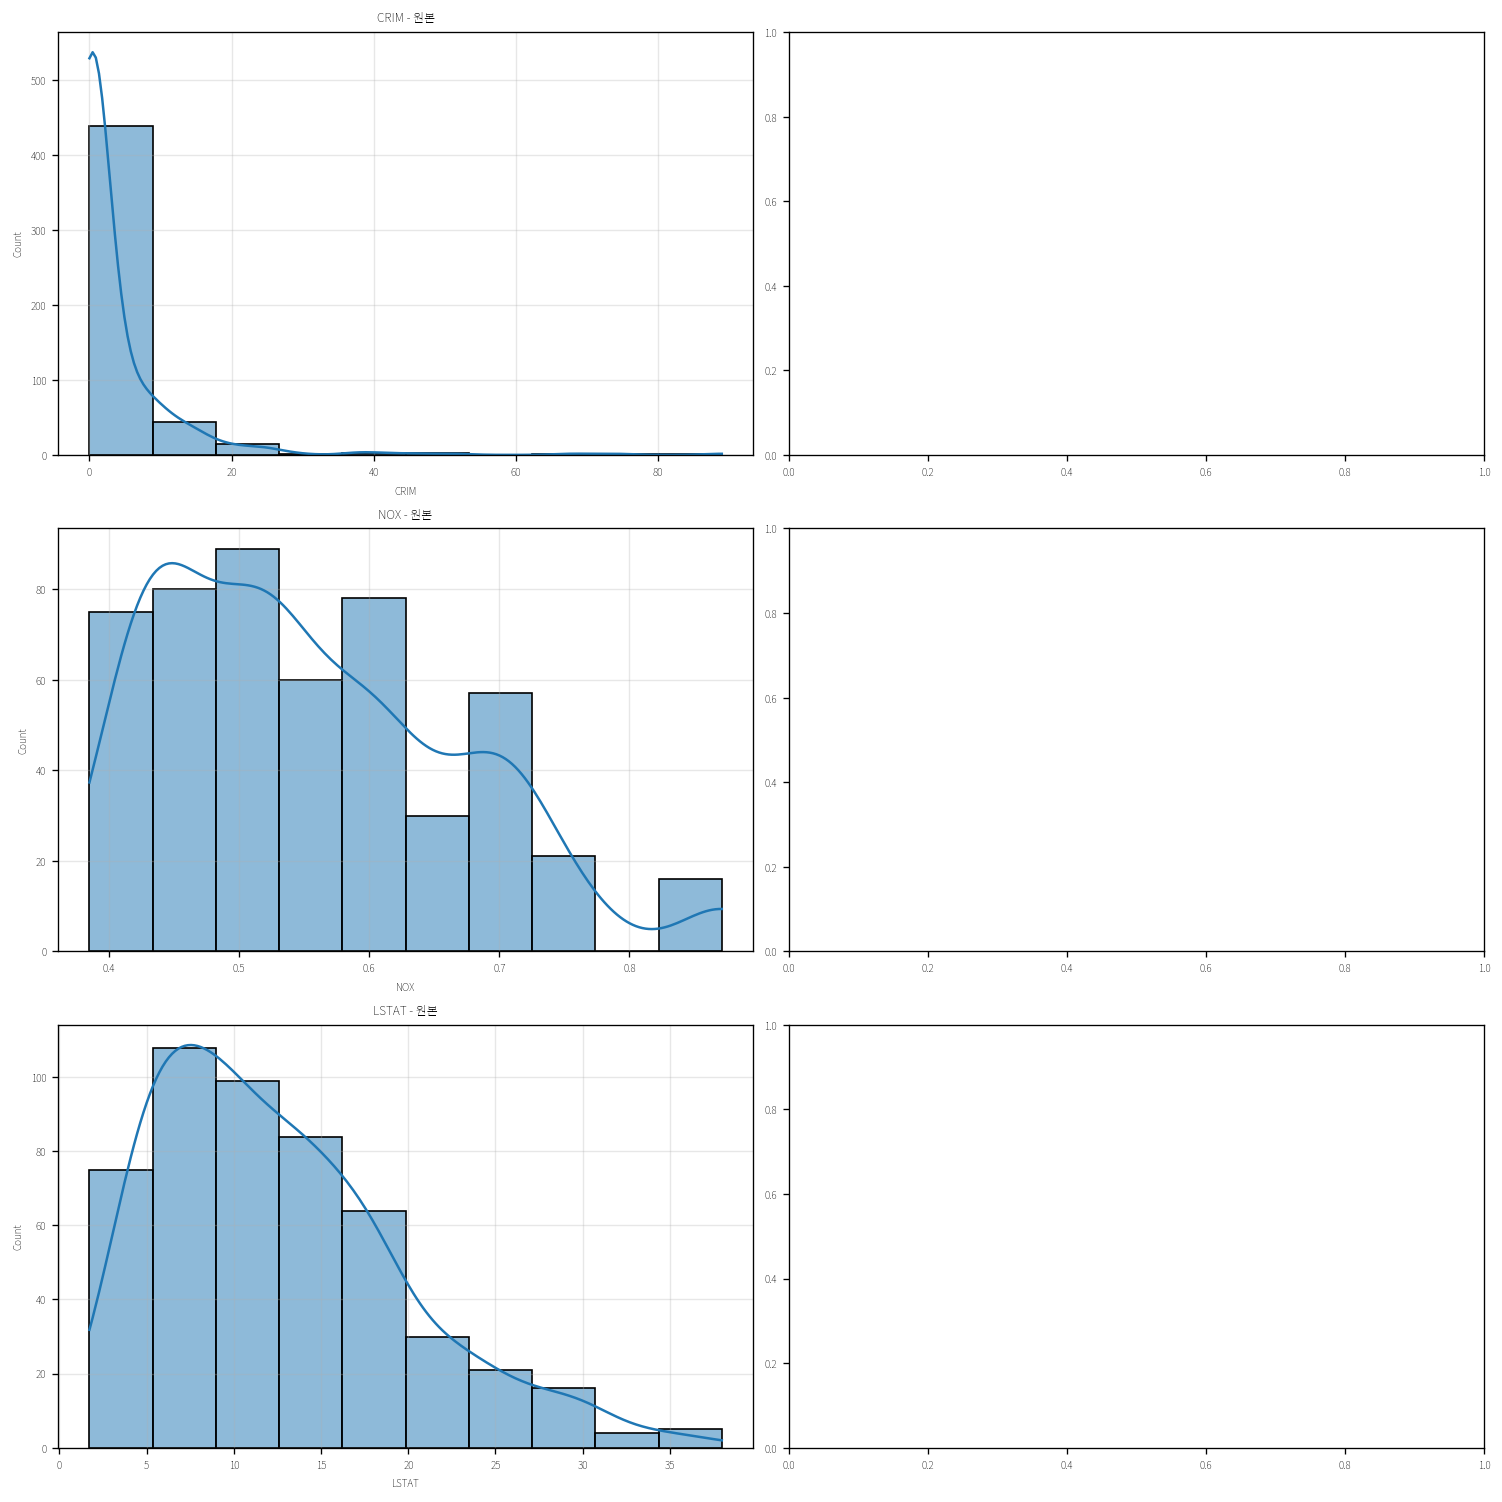

In [31]:
width_px = 1500
height_px = 1500
rows = len(skewed_vars)
cols=2
figsize = (width_px /my_dpi, height_px/my_dpi)
fig, ax = plt.subplots(rows,cols,figsize=figsize, dpi=my_dpi)

# 그래프 그리기->seaborn 사용
for i,  v in enumerate(skewed_vars):
    sb.histplot(data=df, x=v, bins= 10, kde = True, ax=ax[i][0])
    ax[i][0].set_title(f'{v} - 원본')
    ax[i][0].grid(alpha=0.3)
           

fig.subplots_adjust(wspace=0.2,hspace=0.2)

plt.tight_layout()
plt.show()
plt.close()

📝4-1.찰스강변 여부(CHAS)변수의 빈도분석 수행

In [32]:
chas_counts = df['CHAS'].value_counts()
chas_counts

CHAS
0    471
1     35
Name: count, dtype: int64

In [33]:
chas_props = df['CHAS'].value_counts(normalize=True) * 100
chas_props

CHAS
0    93.083004
1     6.916996
Name: proportion, dtype: float64

In [34]:
print(f"비강변 지역(0): {chas_counts[0]:3d}개 ({chas_props[0]:.1f}%)")
print(f"강변 지역(1): {chas_counts[1]:3d}개 (){chas_props[1]:.1f}%")

비강변 지역(0): 471개 (93.1%)
강변 지역(1):  35개 ()6.9%


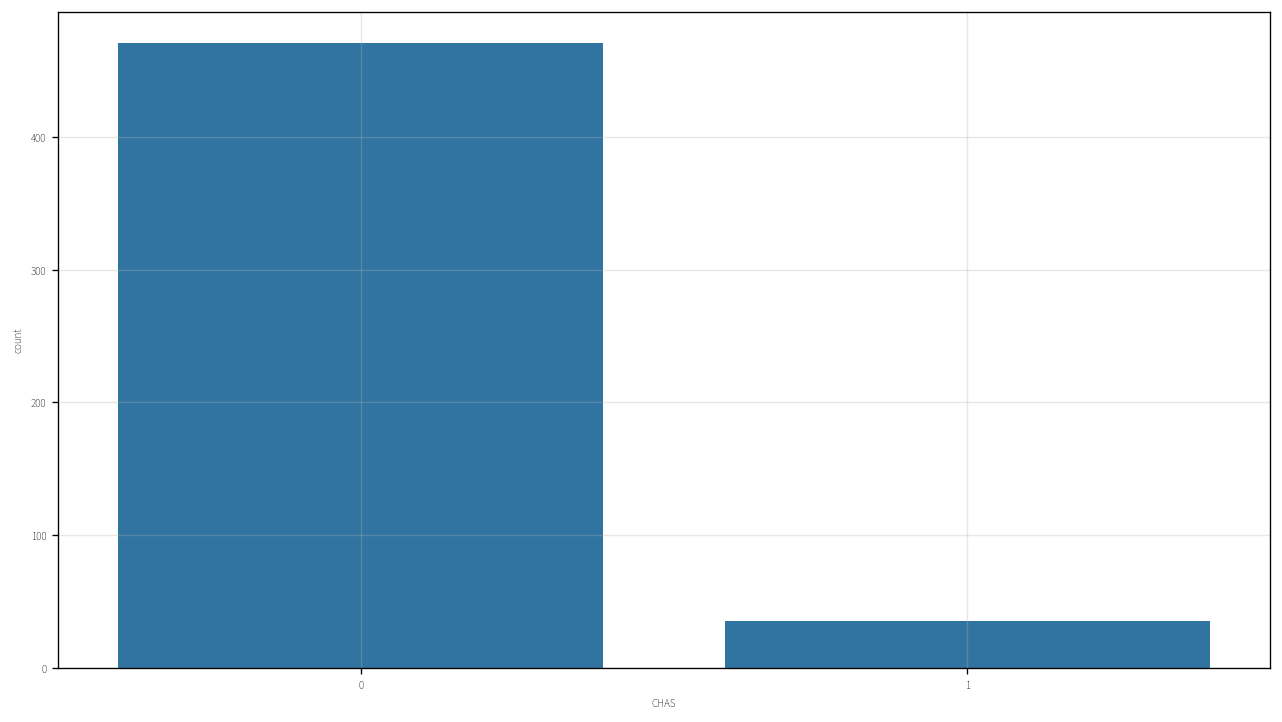

In [35]:
width_px = 1280
height_px = 720
rows = 1
cols=1
figsize = (width_px /my_dpi, height_px/my_dpi)
fig, ax = plt.subplots(rows,cols,figsize=figsize, dpi=my_dpi)

# 그래프 그리기->seaborn 사용
sb.countplot(data=df, x="CHAS")

ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
plt.close()

📝4-2.강변 위치에 따른 주택 가격의 차이를 기초통계량으로 비교 분석

In [37]:
df.groupby('CHAS')['MEDV'].describe()

C:\Users\itwill\AppData\Local\Temp\ipykernel_22876\4275711058.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('CHAS')['MEDV'].describe()


,count,mean,std,min,25%,50%,75%,max
CHAS,,,,,,,,
0,471.0,22.093843,8.831362,5.0,16.6,20.9,24.80,50.0
1,35.0,28.440000,11.816643,13.4,21.1,23.3,33.15,50.0


In [42]:
# 평균 가격 차이 계산
avg_price_non_river = df[df['CHAS']==0]['MEDV'].mean()
avg_price_river = df[df['CHAS']==1]['MEDV'].mean()
price_diff = avg_price_river - avg_price_non_river
print(f"\n가격 차이 분석")
print(f"비강변 지역 평균 가격: ${avg_price_non_river:.2f}K")
print(f"강변 지역 평균 가격: ${avg_price_river:.2f}K")
print(f"가격 차이: ${price_diff:.2f}K ({price_diff/avg_price_non_river*100:.1f}% 높음)")


가격 차이 분석
비강변 지역 평균 가격: $22.09K
강변 지역 평균 가격: $28.44K
가격 차이: $6.35K (28.7% 높음)


[LAB-09]2.명목형 - 기술통계 | 연습문제

In [52]:
from hossam import load_data
from pandas import crosstab
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb

In [46]:
my_dpi = 200
fpath = "./NotoSansKR-Regular.ttf"
fprop = fm.FontProperties(fname=fpath)
fname = fprop.get_name()


plt.rcParams['font.family'] = fname
plt.rcParams['font.size'] = 6
plt.rcParams['axes.unicode_minus'] = False

In [48]:
privacy = load_data('privacy')
privacy.head()

[data] https://data.hossam.kr/data/lab09/privacy.xlsx
[desc] 제주도 남녀 대학생의 개인정보 관리방법에 관한 설문조사 결과 데이터 (출처: 사회조사분석사 2급 실기작업형 기출)
[!] Cannot read metadata


,학생ID,성별,메모종류
0,1,남,3
1,2,여,2
2,3,여,2
3,4,여,1
4,5,여,2


In [49]:
df = privacy.astype({'성별':'category','메모종류':'category'})
df.head()

,학생ID,성별,메모종류
0,1,남,3
1,2,여,2
2,3,여,2
3,4,여,1
4,5,여,2


In [50]:
cb = crosstab(index=df['성별'],columns =df['메모종류'], normalize=True)
cb

메모종류,1,2,3
성별,,,
남,0.066667,0.133333,0.066667
여,0.133333,0.533333,0.066667


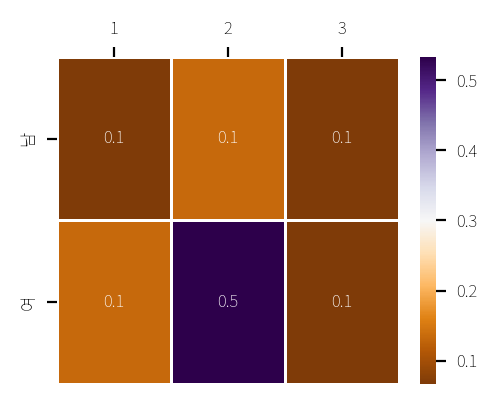

In [56]:
width_px = 500
height_px = 400
rows = 1
cols=1
figsize = (width_px /my_dpi, height_px/my_dpi)
fig, ax = plt.subplots(rows,cols,figsize=figsize, dpi=my_dpi)

# 그래프 그리기->seaborn 사용
sb.heatmap(data=cb, annot = True, fmt = "0.1f", linewidth = 0.5, 
           cmap = "PuOr")

ax.set_xlabel("")
ax.set_ylabel("")
ax.xaxis.tick_top()

plt.tight_layout()
plt.show()
plt.close()

In [58]:
from hossam import load_data
from scipy.stats import t
from matplotlib import font_manager as fm
from matplotlib import pyplot as plt
import seaborn as sb
from math import sqrt

In [59]:
my_dpi = 200
fpath = "./NotoSansKR-Regular.ttf"
fprop = fm.FontProperties(fname=fpath)
fname = fprop.get_name()


plt.rcParams['font.family'] = fname
plt.rcParams['font.size'] = 6
plt.rcParams['axes.unicode_minus'] = False

In [60]:
origin = load_data('height')
origin.head()

[data] https://data.hossam.kr/data/lab10/height.xlsx
[desc] 어느 학교의 학년, 성별, 키에 대한 가상의 조사 자료 (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata


,학년,성별,키
0,1,남자,163
1,2,여자,154
2,1,남자,171
3,3,여자,160
4,4,남자,169


In [ ]:
# 신뢰수준과 대상 데이터
clevel = 0.95
data = origin['키']

In [ ]:
# 샘플 사이즈
n = len(data)
n

36

In [63]:
# 자유도
dof = n-1
dof

35

In [64]:
# 표본평균
sample_mean = data.mean()
sample_mean

np.float64(167.83333333333334)

In [65]:
# 표본 표준 편차
sample_std = data.std()
sample_std

np.float64(7.315345905306578)

In [66]:
# 표본 표준오차
sample_std_error = sample_std/n**0.5
sample_std_error

np.float64(1.2192243175510964)

📝[2]신뢰구간

In [67]:
cmin, cmax = t.interval(clevel, dof, loc = sample_mean,
                        scale=sample_std_error)
cmin,cmax

(np.float64(165.35817637995726), np.float64(170.30849028670943))

📘#03.신뢰구간 범위 시각화

C:\Users\itwill\AppData\Local\Temp\ipykernel_22876\3144039133.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.kdeplot(data=data,fill = False, alpha = 0.5, palette = "pastel")


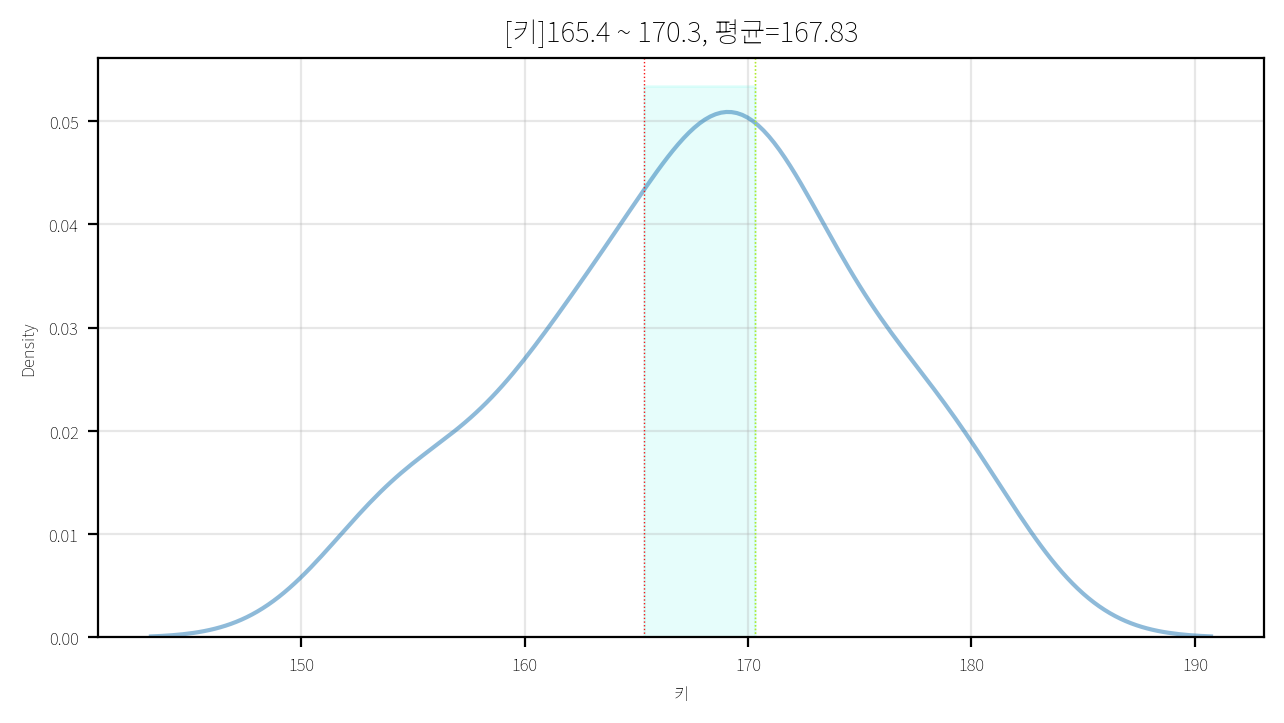

In [77]:
width_px = 1280
height_px = 720
rows = 1
cols=1
figsize = (width_px /my_dpi, height_px/my_dpi)
fig, ax = plt.subplots(rows,cols,figsize=figsize, dpi=my_dpi)

# 그래프 그리기->seaborn 사용
sb.kdeplot(data=data,fill = False, alpha = 0.5, palette = "pastel")

ax.axvline(cmin, linestyle=':', color="#F71717",  linewidth=0.5)
ax.axvline(cmax, linestyle=':',  color="#B2EA30", linewidth=0.5)
ymin, ymax = ax.get_ylim()
ax.fill_between([cmin,cmax],0, ymax, alpha=0.1, color="#0CF5DE")
ax.axvline(cmax, linestyle=':',  color = "#B2EA30", linewidth=0.5)

ax.grid(True, alpha=0.3)
ax.set_title(f"[{data.name}]{cmin:.1f} ~ {cmax:.1f}, 평균={sample_mean:0.2f}", fontsize=10)
plt.tight_layout()
plt.show()
plt.close()